In [1]:
import numpy as np
import random as r
uniform_=r.uniform
gauss_=r.gauss
def uniform(a=0, b=1):
    return uniform_(a, b)
def gauss():
    ret=-1
    while ret<0 or ret>1:
        ret=gauss_(.5, 0.15)
    return ret

def dot6(nums):
    nums*=10**6
    nums=np.floor(nums)
    nums/=10**6
    return nums
def norm(data):
    for i in range(len(data[0])):
        dmin=min(data[:, i])
        dmax=max(data[:, i])
        dd=dmax-dmin
        data[:,i]-=dmin
        data[:, i]/=dd
    return data
def dot6_norm(data):
    data=dot6(data)
    data=norm(data)
    return data

def sample_point_uni(d, b=1.0):
    left=b
    ret=[]
    for i in range(d-1):
        tmp=(1-(uniform(0, 1))**(1/(d-i-1)))
        ret.append(left*tmp)
        left-=ret[-1]
    ret.append(left)
    return ret
def gen_user_uni(n, d):
    ret =[sample_point_uni(d) for _ in range(n)]
    return ret
def gen_pdt_uni(n, d):
    ret=[]
    for i in range(n):
        ret.append([uniform() for _ in range(d)])
    return ret
def gen_pdt_anti(n, d):
#     ret =[sample_point_uni(d) for _ in range(n)]
    # TODO more than 2 dimension
    means=[.5, .5]
    cov=[[1, -.95], [-.95, 1]]
    ret=np.random.multivariate_normal(means, cov, n)
    for i in range(d):
        dmin=min(ret[:, i])
        dmax=max(ret[:, i])
        ret[:,i]-=dmin
        ret[:,i]/=(dmax-dmin)
    return ret
def gen_pdt_corr(n, d):
    mean=[.5 for _ in range(d)]
    cov=[]
    for i in range(d):
        tmp=[]
        for j in range(d):
            if i==j:
                tmp.append(1)
            else:
                tmp.append(.95)
        cov.append(tmp)
    data = np.random.multivariate_normal(mean, cov, n)
    data=dot6_norm(data)
    return data

In [2]:
def get_sk(user, pdt, k):
    pdtT=pdt.T
    sk=np.zeros(len(user))
    for uid in range(len(user)):
        scores = np.dot(user[uid],pdtT)
        scores = sorted(scores, reverse=True)
        sk[uid]=scores[k]
    return sk
def sampleP(cardD, cardP):
    return r.sample(range(cardD), cardP)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_user(user, save=False, fn='', format='eps'):
    fig, ax = plt.subplots()
    user_a = np.array(user).T
    ax.scatter(user_a[0], user_a[1])
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_user(user)
    else:
        plt.show()


def plot_pdt(pdt, save=False, fn='', format='eps'):
    plot_user(pdt, save, fn, format)


def plot_halfspace(r, c, save=False, fn='', format='eps'):
    fig, ax = plt.subplots()
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    for i in range(len(r)):
        row = r[i]
        if row[0] == 0 or row[1] == 0:
            continue
        ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]])
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_halfspace(r, c)
    else:
        plt.show()


def plot_pdt_hs(pdt, pdt_p, pdt_c, r, c, covered=set(), save=False, fn='', format='eps'):
    fig, ax = plt.subplots()
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    for i in range(len(r)):
        row = r[i]
        if row[0] == 0 or row[1] == 0:
            continue
        if i in covered:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], alpha=0.2, c='cyan')
        else:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]],  alpha=0.2, c='orange')
    pdtT = pdt.T
    ax.scatter(pdtT[0], pdtT[1], c='grey', s=10)
    ax.scatter(pdt[pdt_p, 0], pdt[pdt_p, 1], c='blue', s=10)
    ax.scatter(pdt[pdt_c, 0], pdt[pdt_c, 1], c='red', s=30)
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_pdt_hs(pdt, pdt_p, pdt_c, r, c, covered)
    else:
        plt.show()


def plot_pdt_inter_hs(r, c, cost, B, inter=set(), save=False, fn='', format='eps'):
    fig, ax = plt.subplots()
    ax.set_xlabel('p[1]')
    ax.set_ylabel('p[2]')
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
    ax.plot([B / cost[0], 0], [0, B / cost[1]], c='black', linewidth=3)
    for i in range(len(r)):
        row = r[i]
        if row[0] == 0 or row[1] == 0:
            continue
        if i in inter:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], alpha=0.3, c='orange')
        else:
            ax.plot([c[i] / row[0], 0], [0, c[i] / row[1]], alpha=0.3, c='cyan')
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_pdt_inter_hs(r, c, cost, B, inter)
    else:
        plt.show()


def plot_inters(inter_cnt, save=False, fn='', format='eps'):
    fig, ax = plt.subplots()
    ax.set_xlabel('B')
    ax.set_ylabel('Intersect halfspaces')
    tmp = np.array(inter_cnt).T
    x = [1 + i / 10 for i in range(10)]
    labels = ['uniform', 'anti', 'corr']
    style = ['bo-', 'y^-', 'rP-']

    for i in range(tmp.shape[0]):
        ax.plot(x, tmp[i], style[i], label=labels[i], mfc='none')
    # ax.set_yscale('log')
    ax.legend()
    if save:
        plt.savefig(fn + '.'+format, format=format)
        plot_inters(inter_cnt, save=False)
    else:
        plt.show()

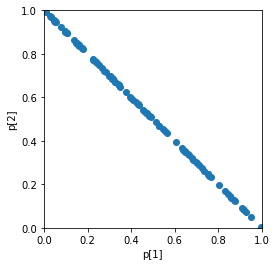

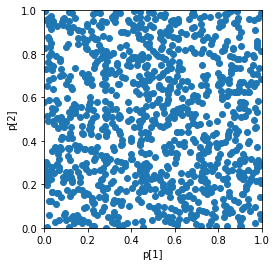

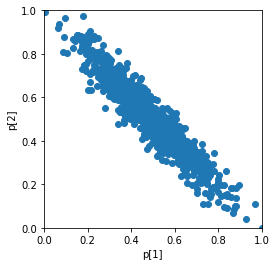

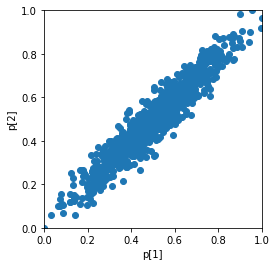

In [10]:
cardD=1000
user=gen_user_uni(100, 2)
pdt_uni=gen_pdt_uni(cardD, 2)
pdt_anti=gen_pdt_anti(cardD, 2)
pdt_corr=gen_pdt_corr(cardD, 2)
plot_user(user)
plot_pdt(pdt_uni)
plot_pdt(pdt_anti)
plot_pdt(pdt_corr)

user=np.array(user)
pdt_uni=np.array(pdt_uni)
pdt_anti=np.array(pdt_anti)
pdt_corr=np.array(pdt_corr)


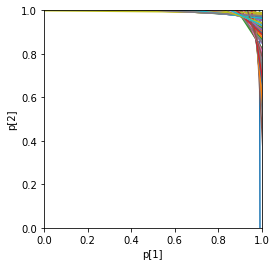

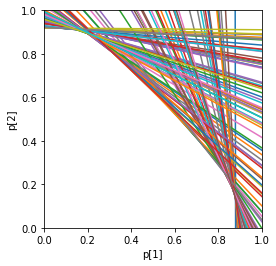

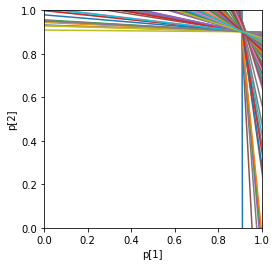

In [14]:
k=5
sk_uni=get_sk(user, pdt_uni, k)
sk_anti=get_sk(user, pdt_anti, k)
sk_corr=get_sk(user, pdt_corr, k)
plot_halfspace(user, sk_uni)
plot_halfspace(user, sk_anti)
plot_halfspace(user, sk_corr)

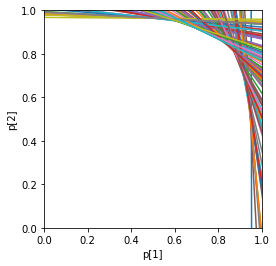

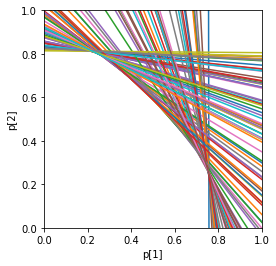

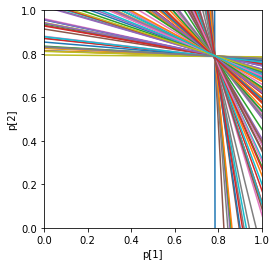

In [17]:
k=40
sk_uni=get_sk(user, pdt_uni, k)
sk_anti=get_sk(user, pdt_anti, k)
sk_corr=get_sk(user, pdt_corr, k)
plot_halfspace(user, sk_uni)
plot_halfspace(user, sk_anti)
plot_halfspace(user, sk_corr)

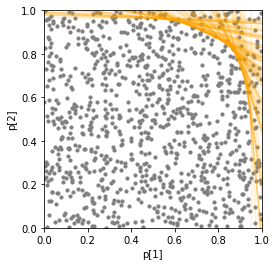

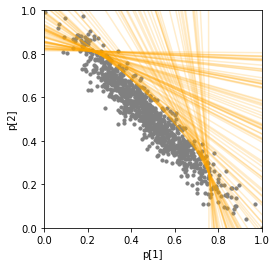

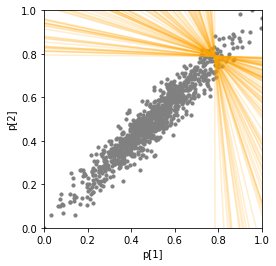

In [20]:
save=False
fm='pdf'
pdt_pset=[]
pdt_c_uni1=[]
pdt_c_anti1=[]
pdt_c_corr1=[]
covered_uni1=[]
covered_anti1=[]
covered_corr1=[]
plot_pdt_hs(pdt_uni, pdt_pset,pdt_c_uni1, user, sk_uni, covered_uni1, save=save, fn='cover_uni', format=fm)
plot_pdt_hs(pdt_anti, pdt_pset,pdt_c_anti1, user, sk_anti, covered_anti1, save=save, fn='cover_anti', format=fm)
plot_pdt_hs(pdt_corr, pdt_pset,pdt_c_corr1, user, sk_corr, covered_corr1, save=save, fn='cover_corr',  format=fm)